In [1]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mglearn
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [25]:
from sklearn.datasets import load_wine
wine = load_wine()
# print(wine.DESCR)

In [28]:
# wine data를 각 샘플들을 특성별로 확인해보기 위해 data frame 생성
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0


In [4]:
# 먼저 wine 데이터를 정규화
# knn에서는 각 특성의 규모가 너무 차이나면 정확한 측정이 어렵기 때문에
# 각 특성들의 규모를 정규화 작업을 통해 규모를 비슷하게 설정
scaler = StandardScaler()

X = scaler.fit_transform(wine.data)
y = wine.target

# 정규화된 wine data의 data frame 생성
df_scaleddata = pd.DataFrame(data=X, columns=wine.feature_names)
df_scaleddata.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,1.365208,1.502943,-0.262708,-0.392751,-1.274305,1.596623,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


In [5]:
# training, validation, subtrain, test set으로 data구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=21)
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, test_size=0.112, stratify= y_train, random_state=21)

# 전체 data중 10%는 test set, 10%는 validation set, 80%는 training set으로 분할
# validation check 이후, 전체 training set으로 학습한 뒤 test set으로 성능 평가예정
print("Train set size    : {}".format(X_train.shape))
print("Subtrain set size : {}".format(X_subtrain.shape))
print("Valid set size    : {}".format(X_val.shape))
print("Test set size     : {}".format(X_test.shape))

Train set size    : (160, 13)
Subtrain set size : (142, 13)
Valid set size    : (18, 13)
Test set size     : (18, 13)


In [6]:
# 긱각 k 값의 변화에 따른 knn1(맨해튼 공식 사용), knn2(유클리드 공식 사용)에서 validation set의 성능을 저장
valid_scores1=[] 
valid_scores2=[]
test_scores1=[]
test_scores2=[]

# k의 값으로 3부터 141까지 사용
kval = np.arange(3, 142)

for k in kval:
    knn1 = KNeighborsClassifier(n_neighbors=k, p=1)
    knn2 = KNeighborsClassifier(n_neighbors=k, p=2)

    knn1.fit(X_subtrain, y_subtrain)
    knn2.fit(X_subtrain, y_subtrain)
    
    valid_scores1.append(knn1.score(X_val, y_val))
    valid_scores2.append(knn2.score(X_val, y_val))
    
    knn1.fit(X_train, y_train)
    knn2.fit(X_train, y_train)
    
    test_scores1.append(knn1.score(X_test, y_test))
    test_scores2.append(knn2.score(X_test, y_test))

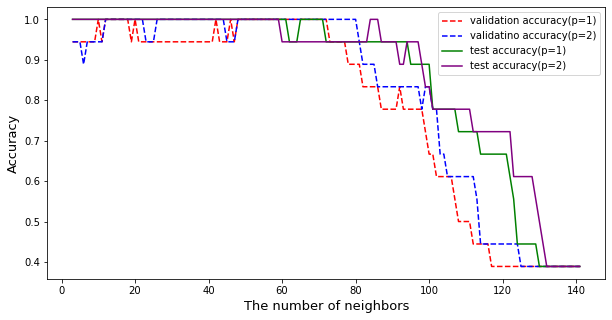

In [7]:
# 빨간선은 Nanhattan distance 사용, 파란선은 Euclidean distance 사용
plt.figure(figsize=(10, 5))
plt.plot(kval, valid_scores1, c='r', ls='--', label='validation accuracy(p=1)')
plt.plot(kval, valid_scores2, c='b', ls='--', label='validatino accuracy(p=2)')
plt.plot(kval, test_scores1, c='g', label='test accuracy(p=1)')
plt.plot(kval, test_scores2, c='purple', label='test accuracy(p=2)')
plt.xlabel("The number of neighbors", size= 13)
plt.ylabel("Accuracy", size= 13)
plt.legend()
plt.show()

# k의 값이 커질수록 성능이 낮아지는 것을 확인

In [8]:
# optimal hyper parameter를 적용한 최종 모델 선정
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=1,
                     weights='uniform')
knn.fit(X_subtrain, y_subtrain)
# 최종 모델과 해당 모델의 성능 출력
print(knn)
print("validation accuracy : {:.3f}".format(knn.score(X_val, y_val)))

#최종 모델을 전체 training set으로 학습하고 test set으로 최종 성능 점검
knn.fit(X_train, y_train)
print("test accuracy       : {:.3f}".format(knn.score(X_test, y_test)))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=1,
                     weights='uniform')
validation accuracy : 0.944
test accuracy       : 1.000


In [9]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=wine.target_names))
print(precision_score(y_test, y_pred, average='weighted', pos_label=1))
print(recall_score(y_test, y_pred, average='weighted', pos_label=1))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00         6
     class_1       1.00      1.00      1.00         7
     class_2       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

1.0
1.0


No handles with labels found to put in legend.


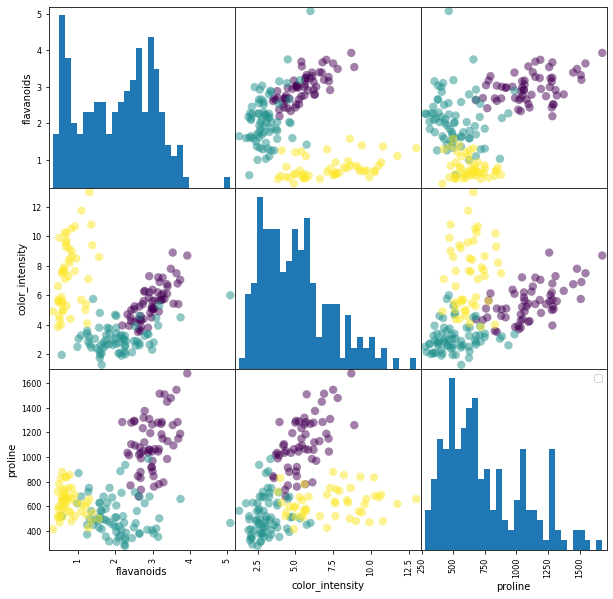

In [23]:
# 와인 데이터의 세 특성에 따른 클래스 분류 시각화
# wine.data를 넣어 전체를 확인할 수 도 있음

df_wine = pd.DataFrame(wine.data[:, [6,9,12]], columns=['flavanoids', 'color_intensity', 'proline'])
pd.plotting.scatter_matrix(df_wine, c=wine.target,
                  hist_kwds={'bins':30},
                  marker='o', s=70, alpha=0.5, figsize=(10, 10))
plt.legend()
plt.show()